In [5]:
import numpy as np
%pylab inline
from time import clock

Populating the interactive namespace from numpy and matplotlib


### Problem 8 ###

The four adjacent digits in the 1000-digit number that have the greatest product are 9 × 9 × 8 × 9 = 5832.



73167176531330624919225119674426574742355349194934
96983520312774506326239578318016984801869478851843
85861560789112949495459501737958331952853208805511
12540698747158523863050715693290963295227443043557
66896648950445244523161731856403098711121722383113
62229893423380308135336276614282806444486645238749
30358907296290491560440772390713810515859307960866
70172427121883998797908792274921901699720888093776
65727333001053367881220235421809751254540594752243
52584907711670556013604839586446706324415722155397
53697817977846174064955149290862569321978468622482
83972241375657056057490261407972968652414535100474
82166370484403199890008895243450658541227588666881
16427171479924442928230863465674813919123162824586
17866458359124566529476545682848912883142607690042
24219022671055626321111109370544217506941658960408
07198403850962455444362981230987879927244284909188
84580156166097919133875499200524063689912560717606
05886116467109405077541002256983155200055935729725
71636269561882670428252483600823257530420752963450

Find the thirteen adjacent digits in the 1000-digit number that have the greatest product. What is the value of this product?



In [2]:
a = 7316717653133062491922511967442657474235534919493496983520312774506326239578318016984801869478851843858615607891129494954595017379583319528532088055111254069874715852386305071569329096329522744304355766896648950445244523161731856403098711121722383113622298934233803081353362766142828064444866452387493035890729629049156044077239071381051585930796086670172427121883998797908792274921901699720888093776657273330010533678812202354218097512545405947522435258490771167055601360483958644670632441572215539753697817977846174064955149290862569321978468622482839722413756570560574902614079729686524145351004748216637048440319989000889524345065854122758866688116427171479924442928230863465674813919123162824586178664583591245665294765456828489128831426076900422421902267105562632111110937054421750694165896040807198403850962455444362981230987879927244284909188845801561660979191338754992005240636899125607176060588611646710940507754100225698315520005593572972571636269561882670428252483600823257530420752963450

In [3]:
b  = str(a)

In [4]:
len(b)

1000

def linprod(x,n):
    'calcula o maior produto numa linha, com n fatores, de uma string x'
    newmaxi = [0]
    for i in range(0,1000-n):
        geg = 1
        for j in range(i,i+n):
            geg = geg * int(x[j])
        if geg >= newmaxi[-1]:
            newmaxi.append(geg)
    return newmaxi[-1]
    

In [5]:
def exec8(x,n):
    a  = ''
    with open(x,'r') as file:
        ks = (file.readlines())
        for k in ks:
            a += str(k).replace('\n','')
    l = a
    newmaxi = [0]
    for i in range(0,1000-n):
        geg = 1
        for j in range(i,i+n):
            geg = geg * int(l[j])
        if geg >= newmaxi[-1]:
            newmaxi.append(geg)
    return newmaxi[-1]

In [6]:
%timeit exec8('a8.txt',13)

100 loops, best of 3: 16.4 ms per loop


In [7]:
%timeit exec8('a8.txt',13)

100 loops, best of 3: 14.9 ms per loop


### A more general problem ###


In [6]:
def numbers(cs,ls):
    'generates a numbers.txt file, with a string with l lines and c characters per line'
    with open('numbers.txt', 'w') as file:
        for l in range(ls):
            for c in range(cs):
                k = np.random.randint(0,10)
                file.write(str(k))
            file.write('\n')

In [13]:
def lps(file,lenght):
    'largest product in a series of l numbers of a file'
    'colocando tudo numa string só'
    with open(file,'r') as file:
        ks = (file.readlines())
        a = ''
        product = 1
        maxprod = 0
        u = 0
        for k in ks: # aqui removemos o \n somando numa string vazia os termos até o \n ( que sabemos q estao no final da linha)
            a += k[:-1]
        while u < len(a):
            for i in range(lenght): # zeros checker
                if u+i < len(a):
                    if a[u+i] == 0:
                        u += 1+i
                        break
                else:
                    return maxprod
            if u < lenght:
                product *= int(a[u])
            if u >= lenght:
                if int(a[u-lenght]) != 0:
                    product /= int(a[u-lenght])
                product *= int(a[u])
            if product > maxprod:
                maxprod = product
            u += 1
        return maxprod

In [11]:
numbers(5,5)

In [14]:
lps('numbers.txt',3)

88810

94599

63300

23690

48477



512

In [12]:
%timeit lps('a8.txt',13)

100 loops, best of 3: 14.2 ms per loop


In [13]:
%timeit exec8('a8.txt',13)

100 loops, best of 3: 15.6 ms per loop


In [14]:
xs1 = np.arange(100,1050,50)
ts1 = []
c = 11

In [15]:
for x in xs1:
    numbers(x,x)
    t0 = clock()
    lps('numbers.txt',c)
    t1 = clock()
    ts1.append(t1-t0)

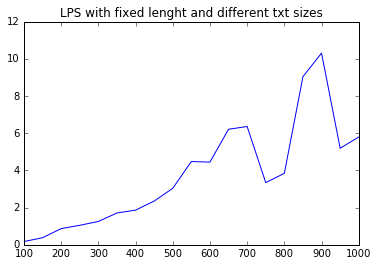

In [16]:
plot(xs1,ts1)
title('LPS with fixed lenght and different txt sizes');

In [17]:
xs2 = np.arange(10,51,5)
numbers(1000,1000)
ts2 = []

In [18]:
for x in xs2:
    t0 = clock()
    lps('numbers.txt',x)
    t1 = clock()
    ts2.append(t1-t0)

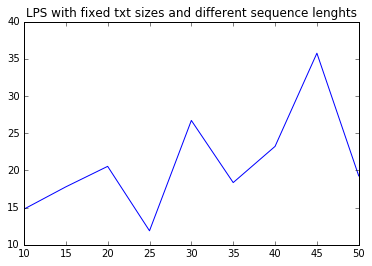

In [19]:
plot(xs2,ts2)
title('LPS with fixed txt sizes and different sequence lenghts');

In [20]:
def rngrng(cs,ls):
    lines = []
    'creates a txt file with l lines and c digits per lines'
    with open('numbers.txt', 'w') as n:
        for l in range(ls):
            for c in range(cs):
                n.write(str(np.random.randint(0,10)))
            n.write('\n')
    n.close()

In [21]:
def horner(x,coefs,yTemp = 0):
    if len(coefs)==1:
        return yTemp + coefs[0]
    yTemp = (coefs[-1]+yTemp)*x
    return horner(x,coefs[:-1],yTemp)

def eval_p(coefs):
    def p(x):
        return horner(x,coefs)
    return p

In [22]:
cs = np.arange(100,1001,100)

In [23]:
tempos = []
rngrng(15,15)
for c in cs:
    rngrng(c,c)
    t0 = clock()
    lps('numbers.txt',10)
    t1 = clock()
    tempos.append(t1-t0)
    

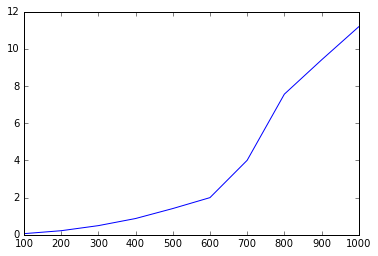

In [24]:
plot(cs,tempos);

In [25]:
coefst = np.polyfit(cs,tempos,2)

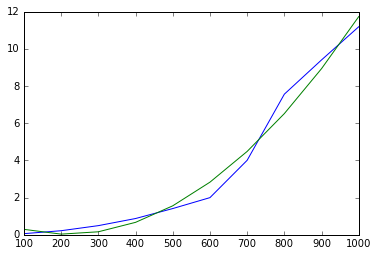

In [26]:
plot(cs,tempos);
plot(cs,eval_p(coefst[::-1])(cs));

In [29]:
ks = arange(12,49)
c = 12
rngrng(c,c)

In [30]:
temposk = []
lps('numbers.txt',9)
for k in ks:
    t0 = clock()
    for _ in range(10):
        lps('numbers.txt',k)
    t1 = clock()
    temposk.append(t1-t0)

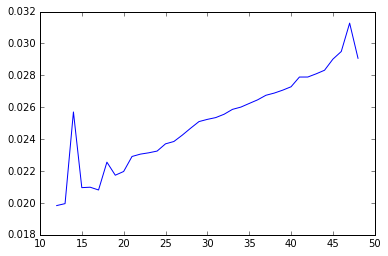

In [31]:
plot(ks,temposk);

In [32]:
coefs = np.polyfit(ks,temposk,1)

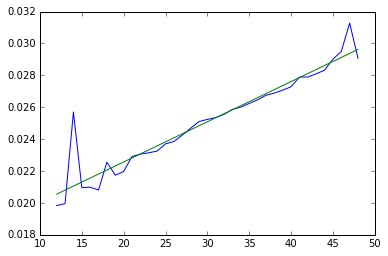

In [33]:
plot(ks,temposk);
plot(ks,eval_p(coefs[::-1])(ks));

In [2]:
a  = [1,2,3,4,5,6,7,8,9]

In [3]:
len(a) , len(a[:5])

(9, 5)

## problema

Qual a probabilidade num arquivo KxK ( com k linhas e k caracteres por linha) de entre dois 0 conter p digitos nao nulos consecutivos.

In [396]:
def numbers(cs,ls):
    'generates a numbers.txt file, with a string with l lines and c characters per line'
    with open('numbers.txt', 'w') as file:
        for l in range(ls):
            for c in range(cs):
                k = np.random.randint(0,10)
                file.write(str(k))
            file.write('\n')

def pe008_dumby(x,n,cs):
    'returns the p8 doing all the products.'
    a  = ''
    with open(x,'r') as file:
        ks = (file.readlines())
        for k in ks:
            a += str(k).replace('\n','')
    l = a
    newmaxi = [0]
    for i in range(0,cs-n+1):
        geg = 1
        for j in range(i,i+n):
            geg = geg * int(l[j])
        if geg >= newmaxi[-1]:
            newmaxi.append(geg)
    return newmaxi[-1]

def divprod(a,lenght):
    'returns the highest product of len l of  a string dividing and multiplying with no zeroes'
    maxprod = 1
    u = 0
    blocky = 1
    while u < len(a):
        while u < lenght:
            blocky *= int(a[u])
            u +=1
        if blocky > maxprod:
            maxprod = blocky
        if lenght == len(a):
            return maxprod
        blocky /= int(a[u-lenght])
        blocky *= int(a[u])
        if blocky > maxprod:
            maxprod = blocky
        u+=1
    return maxprod
    
def pe008_lilsmarter(file,lenght):
    'largest product in a series of lenght numbers of a file'
    'colocando tudo numa string só'
    with open(file,'r') as file:
        ks = (file.readlines())
        a = ''
        maxprod = []
        j = 0 #zero counter
        for k in ks: # aqui removemos o \n somando numa string vazia os termos até o \n ( que sabemos q estao no final da linha)
            a += k[:-1]
        gigs = a.split('0')
        for gig in gigs:
            if len(gig) >= lenght:
                maxprod.append(divprod(gig,lenght))
        return max(maxprod)

In [397]:
for i in range(4,20):
    numbers(i,i)
    for pp in range(2,9):
        assert(pe008_dumby('numbers.txt',pp,i**2) == pe008_lilsmarter('numbers.txt',pp))


In [386]:
i,pp

(6, 3)

In [365]:
9*5*8*8*4

11520

In [393]:
pe008_dumby('numbers.txt',3,36)

576

In [394]:
pe008_lilsmarter('numbers.txt',3)

['533564225748951626559641192921', '41898']


576.0

In [357]:
pe008_lilsmarter('numbers.txt',3)

378.0

In [342]:
divprod('123',3)

6

In [326]:
c = '33312312332133312'

In [328]:
c.split('2')

['3331', '31', '33', '13331', '']

In [402]:
def timer(func,string,k,c=0,dumb=False):
    if dumb == False:
        t0 = clock()
        func(string,k)
        t1 = clock()
        tf = t1-t0
        return tf
    else:
        t0 = clock()
        func(string,k,c)
        t1 = clock()
        tf = t1-t0
    return tf

In [ ]:
timer(pe008_dumby,)
timer

In [404]:
print('lets measure some time')
times_dumby = []
times_lilsmart = []
k = 13
for j in range(10,20):
    numbers(j,j)
    c = j**2
    beta_dumby = []
    beta_smart = []
    for i in range(100):
        beta_dumby += [timer(pe008_dumby,'numbers.txt',k,c,dumb = True)]
        beta_smart += [timer(pe008_lilsmarter,'numbers.txt',k)]
    beta_dumby.sort()
    beta_smart.sort()
    times_dumby += [sum(beta_dumby[:20])/20]
    times_lilsmart += [sum(beta_smart[:20])/20]

lets measure some time


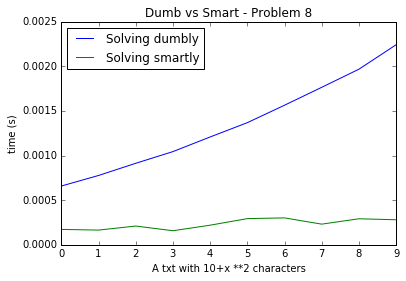

In [409]:
plt.plot(times_dumby,label = 'Solving dumbly');
plt.plot(times_lilsmart,label = 'Solving smartly');
plt.xlabel('A txt with 10+x **2 characters')
plt.ylabel('time (s)')
plt.title('Dumb vs Smart - Problem 8')
plt.legend(loc = 0)
plt.show();

In [413]:
print('now we vary the numbers of numbers in the product and fix the txt file')
times_dumby = []
times_lilsmart = []
j = 1000
numbers(j,j)
c = j**2
for k in range(11,21):
    beta_dumby = []
    beta_smart = []
    for i in range(100):
        beta_dumby += [timer(pe008_dumby,'numbers.txt',k,c,dumb = True)]
        beta_smart += [timer(pe008_lilsmarter,'numbers.txt',k)]
    beta_dumby.sort()
    beta_smart.sort()
    times_dumby += [sum(beta_dumby[:20])/20]
    times_lilsmart += [sum(beta_smart[:20])/20]

now we vary the numbers of numbers in the product and fix the txt file


KeyboardInterrupt: 

In [ ]:
plt.plot(times_dumby,label = 'Solving dumbly');
plt.plot(times_lilsmart,label = 'Solving smartly');
plt.xlabel('A product with 10+x characters')
plt.ylabel('time (s)')
plt.title('Dumb vs Smart - Problem 8 with 1000x1000 txt file')
plt.legend(loc = 0)
plt.show();